In [36]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

### Data Preprocessing

In [37]:
path = 'data/'
csvs = os.listdir(path)
csvs

['Attack.csv', 'environmentMonitoring.csv', 'patientMonitoring.csv']

In [38]:
df1 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df1 = df1.append(df, ignore_index=True)
  print(f'df1.shape: {df1.shape}')

---- Reading Attack.csv ----


c:\Users\Ritik Jangid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (80126, 52)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (111884, 52)
---- Reading patientMonitoring.csv ----
df.shape: (76810, 52)
empty_cols: 0
[]
df1.shape: (188694, 52)


In [39]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags', 'class']


fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']

In [40]:
df1.drop(labels=feats, axis=1, inplace=True)
df1.shape

(188694, 41)

In [41]:
df1.head()

,frame.time_delta,frame.time_relative,frame.len,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,...,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
0,0.000000,0.000000,74,0x00000002,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
1,0.000052,0.000052,74,0x00000012,0.000052,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
2,0.000008,0.000060,74,0x00000002,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
3,0.000012,0.000072,74,0x00000012,0.000012,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
4,0.000003,0.000075,74,0x00000002,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1


In [42]:
df1['label'].value_counts()

0    108568
1     80126
Name: label, dtype: int64

#### Label Encoding

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df1['tcp.flags']= label_encoder.fit_transform(df1['tcp.flags'])
df1['tcp.checksum']= label_encoder.fit_transform(df1['tcp.checksum'])
df1['mqtt.hdrflags']= label_encoder.fit_transform(df1['mqtt.hdrflags'])


In [44]:
df1.head()

,frame.time_delta,frame.time_relative,frame.len,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,...,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
0,0.000000,0.000000,74,0,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
1,0.000052,0.000052,74,4,0.000052,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
2,0.000008,0.000060,74,0,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
3,0.000012,0.000072,74,4,0.000012,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
4,0.000003,0.000075,74,0,0.000000,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1


#### Feature Selection

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [ True  True False  True  True  True False False  True False]
6 selected features
embeded_LR_features:  ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.qos']


In [46]:
# ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']

In [47]:
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'label']
df1 = df1[fs2]
df1.shape

(188694, 11)

#### Test Train split

In [48]:
X_train, X_test, y_train, y_test = train_test_split( df1.drop(labels=['label'], axis=1), df1['label'], test_size=0.3, random_state=100)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM
from sklearn.linear_model import SGDClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [50]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)


print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

print('--------Applying Stochastic Gradient Descent ----------')
SGD = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
SGD.fit(X_train, y_train)
SGD_prediction = SGD.predict(X_test)

print('--------Applying Support Vector Classifier ----------')
SVM = SVC(kernel='linear', random_state = 1)
SVM.fit(X_train, y_train)
SVM_prediction = SVM.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------


c:\Users\Ritik Jangid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------Applying DecisionTree Classifier ----------
--------Applying Stochastic Gradient Descent ----------
--------Applying Support Vector Classifier ----------


In [51]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))


results.append(('SGD ', accuracy_score(y_test,  SGD_prediction)*100,
                precision_score(y_test,  SGD_prediction)*100,
                recall_score(y_test,  SGD_prediction)*100,
                f1_score(y_test,  SGD_prediction)*100))
results.append(('SVM ', accuracy_score(y_test,  SVM_prediction)*100,
                precision_score(y_test,  SVM_prediction)*100,
                recall_score(y_test,  SVM_prediction)*100,
                f1_score(y_test,  SVM_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 79.63044745535163, 99.70475582508777, 52.08637292092209, 68.42638481969277), ('KNN ', 99.64669928809906, 99.7074679259476, 99.45808495560465, 99.58262030969573), ('RF ', 99.70676040912223, 99.78683385579937, 99.52061361457335, 99.65354593646951), ('AB ', 99.55484110300482, 99.4459025955089, 99.50393930551503, 99.47491248541424), ('LogR ', 95.28696850324152, 90.35164086452932, 99.50393930551503, 94.70718933502619), ('DT ', 99.69439488420569, 99.79926396788224, 99.47892784192754, 99.6388384376109), ('SGD ', 95.28343549612252, 90.33564157868847, 99.51644503730877, 94.7040622024754), ('SVM ', 95.33289759578865, 90.41614601082965, 99.53728792363167, 94.75772848128895)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR         

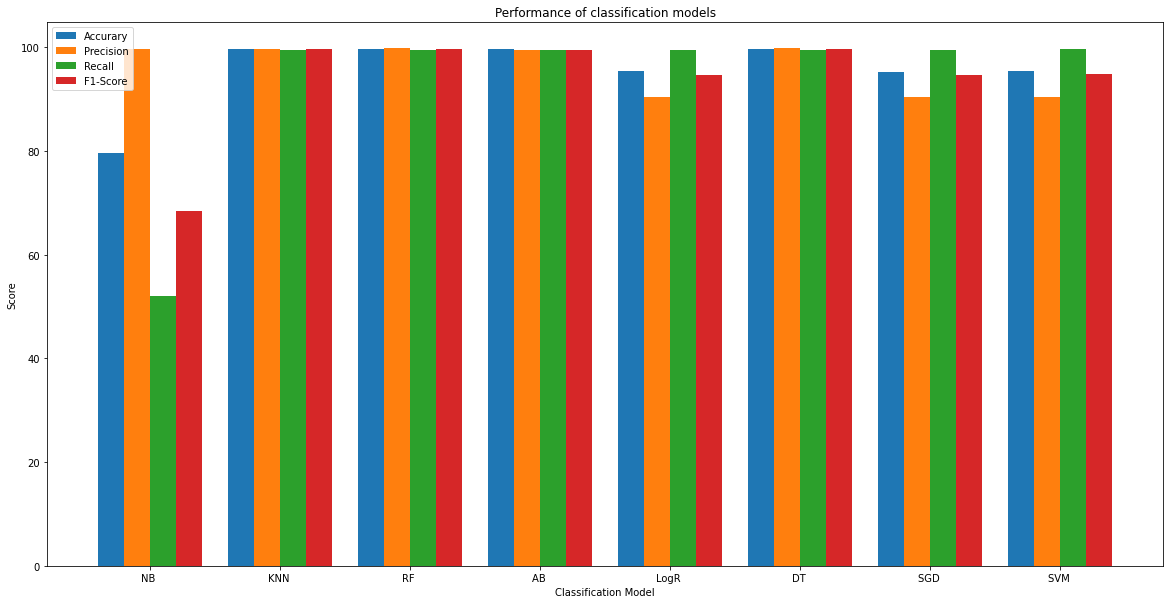

In [52]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))

X_axis = np.arange(len(results)-2)
models_name = [x[0] for x in results[2:]]

accuracy_list = [x[1] for x in results[2:]]
precision_list = [x[2] for x in results[2:]]
recall_list = [x[3] for x in results[2:]]
f1_list = [x[4] for x in results[2:]]


plt.bar(X_axis - 0.3, accuracy_list, 0.2, label = 'Accurary')
plt.bar(X_axis - 0.1, precision_list, 0.2, label = 'Precision')
plt.bar(X_axis + 0.1, recall_list, 0.2, label = 'Recall')
plt.bar(X_axis + 0.3, f1_list, 0.2, label = 'F1-Score')

  
plt.xticks(X_axis, models_name)
plt.xlabel("Classification Model")
plt.ylabel("Score")
plt.title("Performance of classification models")
plt.legend()
plt.show()

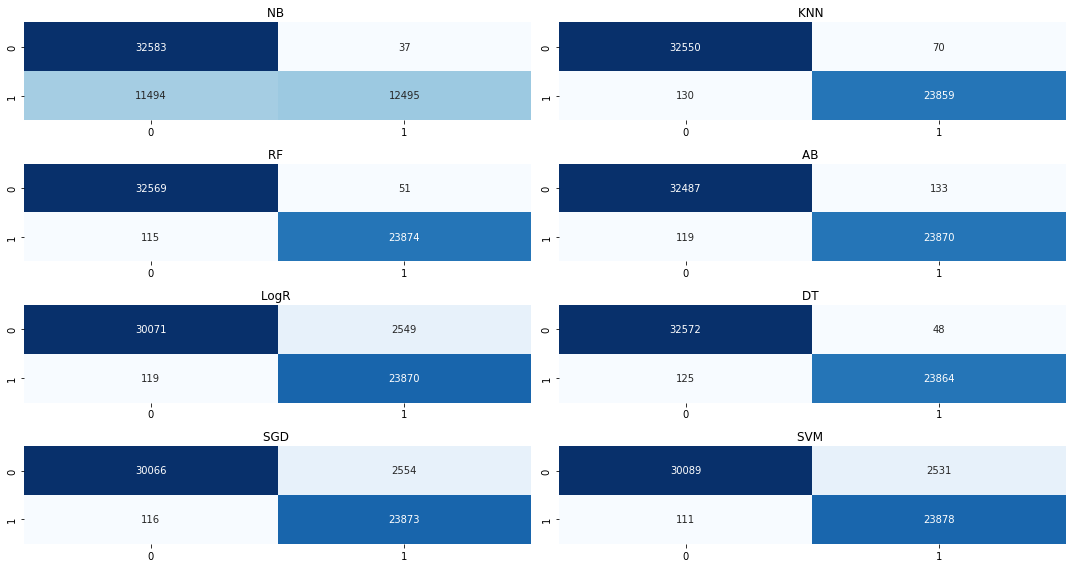

In [53]:
import seaborn as sns

fig, axn = plt.subplots(4,2, sharex=False, sharey=False,figsize=(15,8))

cf_matrix_list = [confusion_matrix(y_test,gnb_prediction),
                confusion_matrix(y_test,KNN_prediction),
                confusion_matrix(y_test,RF_prediction),
                confusion_matrix(y_test,AB_prediction),
                confusion_matrix(y_test,LogR_prediction),
                confusion_matrix(y_test,DT_prediction),
                confusion_matrix(y_test,SGD_prediction),
                confusion_matrix(y_test,SVM_prediction)]

for i, ax in enumerate(axn.flat):
    sns.heatmap(cf_matrix_list[i], ax=ax, square=False, annot=True, cmap='Blues', fmt='d', cbar=False)
    ax.set_title(models_name[i],fontsize=12)

fig.tight_layout()
